name: Gilad X
id : X
homework#5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_image(image):
  image = np.clip(image,0,255)
  image = image.astype(np.uint8)
  plt.imshow(image,cmap='gray')
  plt.show()

In [ ]:
import urllib.request # just for the download part

image_url =  'https://abhijitnathwani.github.io/images/lena512.bmp'
image_path = 'image.jpg'
urllib.request.urlretrieve(image_url, image_path)

('image.jpg', <http.client.HTTPMessage at 0x7f75841bbb10>)

In [ ]:
image = plt.imread(image_path).astype(float)

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

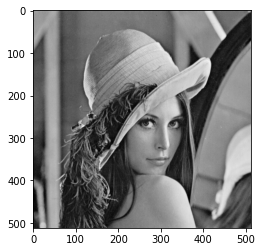

In [ ]:
gray_image = image.copy()
plot_image(gray_image)

In [ ]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

In [ ]:
def edgeDetectInfreq(image,threshhold):

  img = image.copy()
  freqIMG = np.fft.fft2(img)
  centered = np.fft.fftshift(freqIMG)       #transform and -1^x+y so image is centered
  filter = np.ones(centered.shape)
  #loop to check u,v in range from center
  rows, cols = centered.shape
  radius= int(threshhold * min(rows,cols))
  center = (rows//2,cols//2)
  for u in range(cols):
    for v in range(rows):
      if distance((u,v),center) < radius:
         filter[u,v] = 0                     # IHPF ready . now instead of conv , we multiply in freq domain
  filtIMG= centered * filter
  edgemap=np.fft.ifft2(np.fft.fftshift(filtIMG))
  plot_image(np.abs(edgemap))
  plot_image(image)









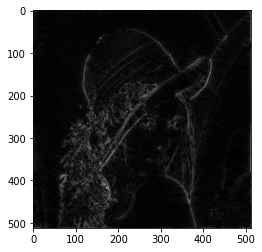

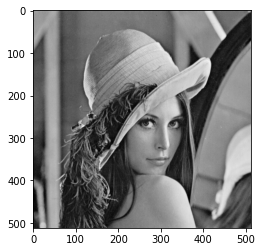

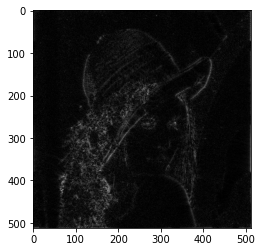

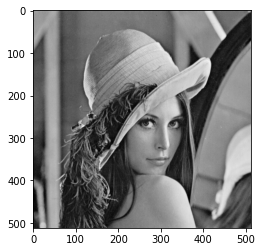

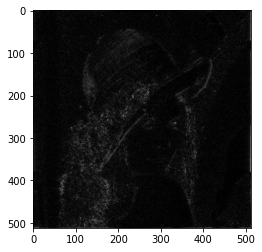

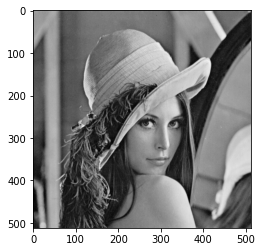

In [ ]:
#results
edgeDetectInfreq(gray_image,0.1)
edgeDetectInfreq(gray_image,0.2)
edgeDetectInfreq(gray_image,0.3)